# **Tugas Kelompok 7 Praktikum Data Mining Modul 2**

### 121450074    Aisyah Tiara Pratiwi
### 121450083    Jelli Kurnilia
### 121450089    Silvina Rizqy Nur Auliya
### 121450107    Natanael Oktavianus Partahan S.
### 121450143    Rafi Fadhlillah

# **Data Integration**

In [ ]:
import pandas as pd #mengimpor library pandas dan menyingkatnya menjadi pd
import numpy as np #untuk operasi matematika dan array multidimensi, dan sering digunakan dalam analisis data numerik.
import matplotlib.pyplot as plt #untuk membuat visualisasi, seperti grafik dan plot
import seaborn as sns #untuk membuat visualisasi data statistik yang lebih menarik dan informatif
from sklearn.decomposition import PCA,TruncatedSVD #untuk reduksi dimensi
from sklearn.manifold import TSNE #teknik reduksi dimensi yang sering digunakan untuk visualisasi data dalam ruang yang lebih rendah

bike = pd.read_csv("/content/drive/MyDrive/PrakDamin/Modul 2/bike_buyers.csv") # import dataset bike_buyers.csv menggunakan pandas kemudian disimpan dalam variabel bike
employee = pd.read_csv("/content/drive/MyDrive/PrakDamin/Modul 2/Employee.csv") # import dataset Employee.csv menggunakan pandas kemudian disimpan dalam variabel employee
bike.head() # menampilkan 5 baris pertama dataset bike

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
employee.head() # menampilkan 5 baris teratas dataset employee

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df = pd.merge(bike, employee, on='Education') # melakukan data integrasi berdasarkan atribut Education dari 2 dataset bike dan employee dan disimpan dalam variabel df
df.head(10) # menampilkan 10 baris teratas sekaligus untuk mengecek apakah data telah berhasil terintegrasi

,ID,Marital Status,Gender_x,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age_x,Purchased Bike,JoiningYear,City,PaymentTier,Age_y,Gender_y,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2017,Bangalore,3,34,Male,No,0,0
1,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2013,Pune,1,28,Female,No,3,1
2,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2014,New Delhi,3,38,Female,No,2,0
3,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2016,Bangalore,3,22,Male,No,0,0
4,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2015,New Delhi,3,38,Male,No,0,0
5,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2016,Bangalore,3,34,Female,No,2,1
6,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2016,Pune,3,23,Male,No,1,0
7,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2016,Pune,3,34,Male,No,3,0
8,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2018,Pune,3,32,Male,Yes,5,1
9,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,42.0,No,2016,Bangalore,3,39,Male,No,2,0


In [ ]:
df.to_csv("intergrasi_databike_dataemployee.csv") # mendownload dataset yang telah berhasil dilakukan data integration

# **Data Transformation and Data Discretization**
## Encoding

In [ ]:
import numpy as np # import numpy dan menyingkatnya menjadi np(digunakan untuk melakukan encoding)

df_employee = pd.read_csv("/content/drive/MyDrive/PrakDamin/Modul 2/Employee.csv") #  mengimport dataset Employee.csv untuk dilakukan encoding dan menyimpannya dalam variabel

In [ ]:
df_employee = df_employee.dropna() # menghapus missing values yang terdapat dalam dataset employee

In [ ]:
dfemployee_categorical = df_employee.select_dtypes(exclude=[np.number]) # menyeleksi tipe data dengan mengecualiakan data number atau numerik sehingga akan menampilkan data kategorik saja
dfemployee_categorical # memanggil variabel untuk melihat atribut kategorik yang telah diseleksi sebelumnya

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes
...,...,...,...,...
4648,Bachelors,Bangalore,Female,No
4649,Masters,Pune,Male,No
4650,Masters,New Delhi,Male,No
4651,Bachelors,Bangalore,Male,Yes


In [ ]:
dfemployee_categorical['Education'].unique() #cek data unik pada atribut Education

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
dfemployee_categorical.Education.value_counts() # menghitung nilai yang terdapat dalam data unik pada atribut Education

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [ ]:
dfemployee_categorical.Education.replace({"Bachelors":1, "Masters":2, "PHD":3}, inplace=True) # melakukan encoding pada atribut Education

In [ ]:
dfemployee_categorical['City'].unique() # cek data unik pada atribut City

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [ ]:
dfemployee_categorical.City.value_counts() # menghitung nilai yang terdapat dalam data unik pada atribut City

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [ ]:
dfemployee_categorical.City.replace({"Bangalore":1, "Pune":2, "New Delhi":3}, inplace=True) # melakukan encoding pada atribut City

In [ ]:
dfemployee_categorical['Gender'].unique() #cek data unik pada atribut Gender

array(['Male', 'Female'], dtype=object)

In [ ]:
dfemployee_categorical.Gender.value_counts() # menghitung nilai yang terdapat dalam data unik pada atribut Gender

Male      2778
Female    1875
Name: Gender, dtype: int64

In [ ]:
dfemployee_categorical.Gender.replace({"Male":1, "Female":0}, inplace=True) # melakukan encoding pada atribut Gender

In [ ]:
dfemployee_categorical['EverBenched'].unique() #cek data unik pada atribut EverBenched

array(['No', 'Yes'], dtype=object)

In [ ]:
dfemployee_categorical.EverBenched.value_counts() # menghitung nilai yang terdapat dalam data unik pada atribut EverBenched

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [ ]:
dfemployee_categorical.EverBenched.replace({"Yes":1, "No":0}, inplace=True)  # melakukan encoding pada atribut EverBenched

In [ ]:
dfemployee_categorical.head(10) # cek apakah sudah berhasil terencoding dengan cara menampilkan 10 baris pertama dataset

,Education,City,Gender,EverBenched
0,1,1,1,0
1,1,2,0,0
2,1,3,0,0
3,2,1,1,0
4,2,2,1,1
5,1,1,1,0
6,1,3,1,0
7,1,1,0,0
8,1,2,1,0
9,2,3,1,0


In [ ]:
dfemployee_categorical.to_csv("encoding_employee.csv") # mendownload dataset yang telah dilakukan encoding

## Data Transformation (Label Encoding)

In [ ]:
data_bike = pd.read_csv("/content/drive/MyDrive/PrakDamin/Modul 2/bike_buyers.csv") #mengimport dataset bike_buyers.csv kemudian disimpan dalam variabel

data_bike = data_bike.dropna() # menghapus missing values pada dataset bike buyers

In [ ]:
databike_column_category = data_bike.select_dtypes(exclude=[np.number]).columns # menyeleksi atribut yang mengandung nilai kategorik yang nantinya akan dilakukan labelencoding
databike_column_category # menampilkan hasil seleksi sebelumnya dengan cara memanggil nama variabelnya

Index(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

In [ ]:
data_bike[databike_column_category].head() # menampilkan 5 baris teratas dataset yang telah diseleksi hanya atribut yang berisi data kategorik saja

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,No
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,No
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,No
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Yes
5,Married,Female,Partial College,Manual,Yes,1-2 Miles,Europe,No


In [ ]:
# Mengimpor kelas LabelEncoder dari pustaka sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Membuat sebuah objek instance dari kelas LabelEncoder
label_encoder = LabelEncoder()

for i in databike_column_category: # # Melakukan label encoding pada setiap kolom dalam data_bike yang merupakan kolom-kolom kategori
  data_bike[i] = label_encoder.fit_transform(data_bike[i])  # setiap kolom dalam data_bike yang merupakan kolom kategori akan mengalami proses "label encoding" menggunakan objek label_encoder

print("Label Encoded Data: ") # menampilkan data yang telah di-label encoding

data_bike.head() # menampilkan 5 baris pertama data yang telah dilakukan label encoding

Label Encoded Data: 


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1
5,13507,0,0,10000.0,2.0,3,2,1,0.0,1,0,50.0,0


In [ ]:
data_bike.to_csv("labelencoding_bikebuyers.csv") # mendownload dataset yang telah dilakukan label encoding

# **Data Reduction**

### PCA on the Digits Dataset - 2 Components

In [ ]:
from sklearn.decomposition import PCA #untuk reduksi dimensi dengan PCA

data_bike.rename(columns={'Purchased Bike': 'Purchased_Bike'}, inplace=True) # Rename kolom 'Purchased Bike' menjadi 'Purchased_Bike' untuk lebih mudah mengakses

X = data_bike.drop(columns=['Purchased_Bike']) # Variabel independen (fitur)
y = data_bike['Purchased_Bike'] # Variabel dependen (target)

In [ ]:
from sklearn.preprocessing import StandardScaler #untuk mengakses fungsi standarisasi data

scaler = StandardScaler() # Membuat objek StandardScaler
X_scaled = scaler.fit_transform(X) #data hasil standarisasi dari variabel independen

In [ ]:
n_components = 2  # Jumlah komponen yang ingin dihasilkan, dapat disesuaikan
pca = PCA(n_components=n_components) # Membuat objek PCA dengan 2 komponen utama
X_pca = pca.fit_transform(X_scaled) # Melakukan PCA pada data yang telah di-standarisasi

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_ # Menghitung rasio varians yang dijelaskan oleh setiap komponen utama
print("Explained Variance Ratio:", explained_variance_ratio) #menampilkan nilai rasio varians

Explained Variance Ratio: [0.19088584 0.1344974 ]


In [ ]:
pca_columns = [f'PC{i}' for i in range(1, n_components + 1)] # Membuat nama kolom untuk komponen utama
pca_df = pd.DataFrame(data=X_pca, columns=pca_columns) # Membuat DataFrame baru dengan komponen utama
pca_df['Purchased_Bike'] = y # Menambahkan kolom 'Purchased_Bike' kembali ke DataFrame PCA

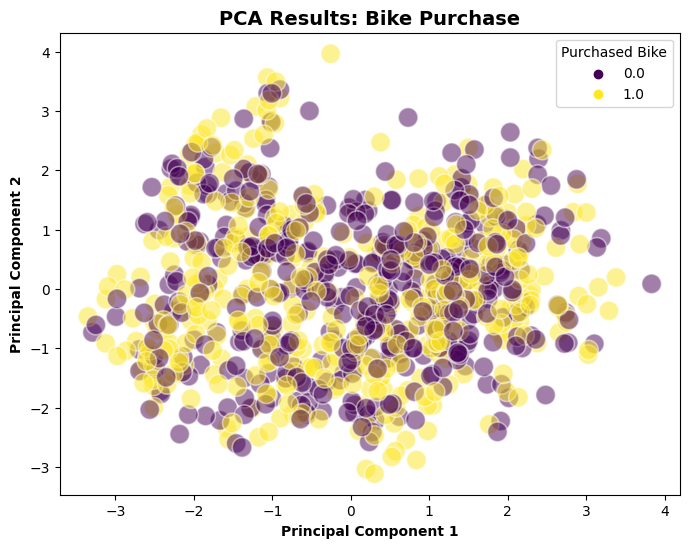

In [ ]:
# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Purchased_Bike', palette='viridis', alpha=0.5, s=200)
plt.title('PCA Results: Bike Purchase', weight='bold', fontsize=14)
plt.xlabel('Principal Component 1', weight='bold', fontsize=10)
plt.ylabel('Principal Component 2', weight='bold', fontsize=10)
plt.legend(title='Purchased Bike', loc='upper right')
plt.show()
# Kode ini digunakan untuk menampilkan plot scatter PCA dengan warna berbeda untuk setiap kategori 'Purchased_Bike'

### SVD on Digits- 2 Components

In [ ]:
# Perform SVD
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False) #untuk melakukan SVD pada matriks X_scaled yang telah di-standarisasi. Hasilnya adalah tiga matriks: U (matriks singular vectors), S (matriks singular values), dan Vt (transpose dari matriks singular vectors).

# Create a DataFrame for the SVD results
svd_columns = [f'SVD{i}' for i in range(1, X_scaled.shape[1] + 1)] #untuk membuat nama kolom untuk matriks U. Nama kolomnya akan menjadi 'SVD1', 'SVD2', dan seterusnya
svd_df = pd.DataFrame(data=U, columns=svd_columns) #matriks U (singular vectors) diubah menjadi DataFrame baru
svd_df['Purchased_Bike'] = y #menambahkan kolom target 'Purchased_Bike'

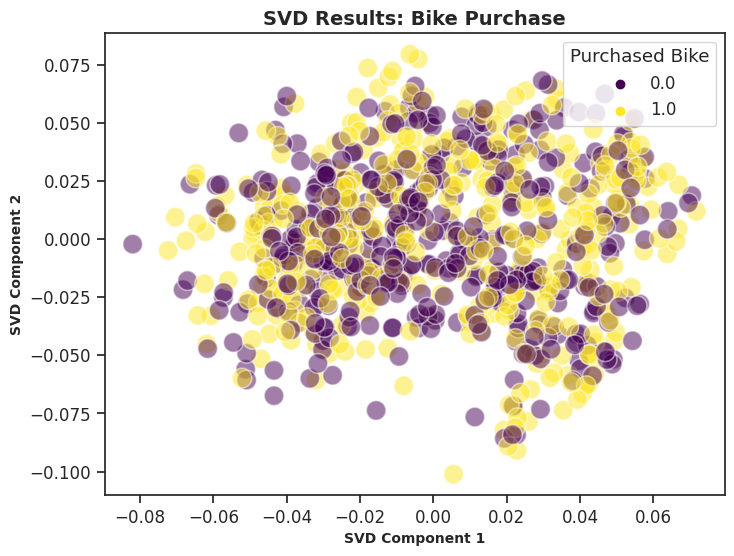

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SVD1', y='SVD2', data=svd_df, hue='Purchased_Bike', palette='viridis', alpha=0.5, s=200)
plt.title('SVD Results: Bike Purchase', weight='bold', fontsize=14)
plt.xlabel('SVD Component 1', weight='bold', fontsize=10)
plt.ylabel('SVD Component 2', weight='bold', fontsize=10)
plt.legend(title='Purchased Bike', loc='upper right')
plt.show()
# Kode ini digunakan untuk menampilkan plot scatter SVF dengan warna berbeda untuk setiap kategori 'Purchased_Bike'

### TSNE on Digits - 2 Components

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42) # Membuat objek t-SNE dengan 2 komponen utama
X_tsne = tsne.fit_transform(X_scaled) # Melakukan t-SNE pada data yang telah di-standarisasi

In [ ]:
# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2']) # Membuat DataFrame untuk hasil t-SNE
tsne_df['Purchased_Bike'] = y # Menambahkan kolom target 'Purchased_Bike' ke DataFrame hasil t-SNE

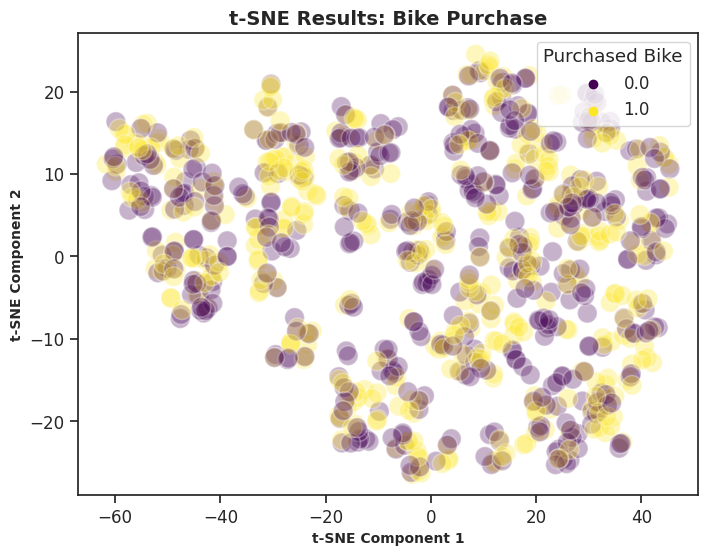

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1) # Mengatur konteks dan ukuran font Seaborn
sns.set_style("ticks") # Mengatur gaya plot scatter


# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=tsne_df, hue='Purchased_Bike', palette='viridis', alpha=0.3, s=200)
plt.title('t-SNE Results: Bike Purchase', weight='bold', fontsize=14)
plt.xlabel('t-SNE Component 1', weight='bold', fontsize=10)
plt.ylabel('t-SNE Component 2', weight='bold', fontsize=10)
plt.legend(title='Purchased Bike', loc='upper right')
plt.show()

### TSNE on Digits - 3 Components

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # Import modul untuk plot 3D

# Perform t-SNE with 3 components for 3D plot
tsne = TSNE(n_components=3, random_state=42) # Membuat objek t-SNE dengan 3 komponen utama
X_tsne = tsne.fit_transform(X_scaled) # Melakukan t-SNE pada data yang telah di-standarisasi


In [ ]:
# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2', 't-SNE3']) # Membuat DataFrame untuk hasil t-SNE
tsne_df['Purchased_Bike'] = y # Menambahkan kolom target 'Purchased_Bike' ke DataFrame hasil t-SNE


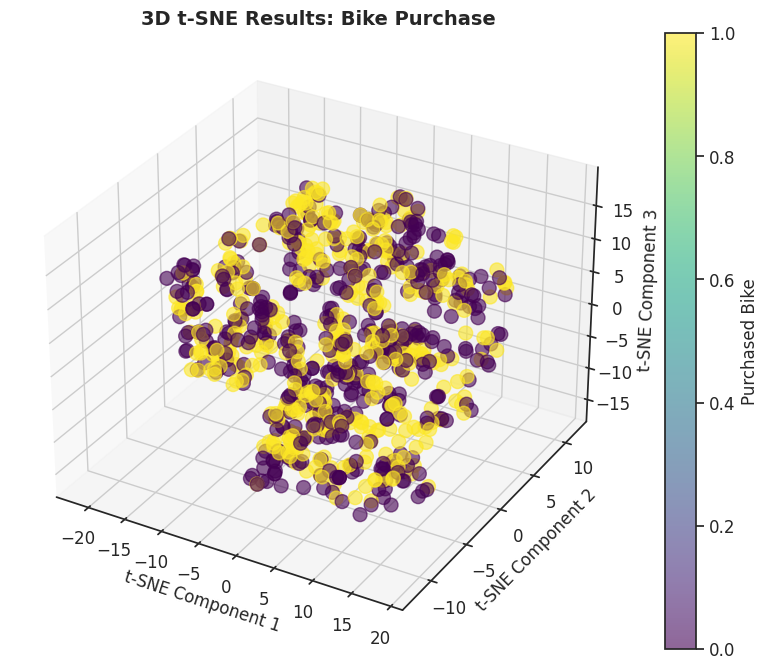

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1) # Mengatur konteks dan ukuran font Seaborn
sns.set_style("ticks") # Mengatur gaya plot scatter

# Create 3D scatterplot
fig = plt.figure(figsize=(10, 8)) # Membuat figure dengan ukuran 10x8 inci
ax = fig.add_subplot(111, projection='3d') # Membuat subplot 3D
scatter = ax.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], tsne_df['t-SNE3'], c=tsne_df['Purchased_Bike'], cmap='viridis', s=100, alpha=0.6)
ax.set_xlabel('t-SNE Component 1', fontsize=12)
ax.set_ylabel('t-SNE Component 2', fontsize=12)
ax.set_zlabel('t-SNE Component 3', fontsize=12)
plt.title('3D t-SNE Results: Bike Purchase', weight='bold', fontsize=14)

# Create a colorbar
legend = plt.colorbar(scatter, label='Purchased Bike')
legend.set_label('Purchased Bike', fontsize=12)

plt.show()

## **Data Discretization**

In [ ]:
bike_discritization = pd.read_csv("/content/drive/MyDrive/PrakDamin/Modul 2/bike_buyers.csv") # mengimport dataset bike_buyers.csv
bike_discritization.head() # menampilkan 5 baris teratas dataset

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
bike_discritization = bike_discritization.dropna() # menghapus missing values yang terdapat dalam dataset

In [ ]:
# Discretization pada kolom 'Income'

# Menggambarkan interval untuk kategori pendapatan ('Income')
income_bins = [0, 40000, 80000, float('inf')]
# Menentukan label yang akan digunakan untuk setiap interval pendapatan
income_labels = ['Low', 'Medium', 'High']


# Discretization pada kolom 'Age'

# Menggambarkan interval untuk kategori usia ('Age')
age_bins = [0, 30, 40, 50, float('inf')]
# Menentukan label yang akan digunakan untuk setiap interval usia
age_labels = ['<30', '30-39', '40-49', '50+']


# Melakukan discretization pada kolom 'Income' menggunakan interval dan label yang telah ditentukan
bike_discritization['Income Category'] = pd.cut(bike_discritization['Income'], bins=income_bins, labels=income_labels)
# Melakukan discretization pada kolom 'Age' menggunakan interval dan label yang telah ditentukan
bike_discritization['Age Category'] = pd.cut(bike_discritization['Age'], bins=age_bins, labels=age_labels)


bike_discritization.head(10) #menampilkan 10 baris teratas dataset yang telah berhasil dilakukan data descritization untuk pengecekan hasil

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Income Category,Age Category
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,Low,40-49
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,Low,40-49
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,Medium,50+
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,Low,30-39
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No,Low,40-49
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes,Low,40-49
10,22173,Married,Female,30000.0,3.0,High School,Skilled Manual,No,2.0,1-2 Miles,Pacific,54.0,Yes,Low,50+
11,12697,Single,Female,90000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,36.0,No,High,30-39
13,25323,Married,Male,40000.0,2.0,Partial College,Clerical,Yes,1.0,1-2 Miles,Europe,35.0,Yes,Low,30-39
14,23542,Single,Male,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,Pacific,45.0,Yes,Medium,40-49


In [ ]:
bike_discritization.to_csv("descritization_bikebuyers.csv") # mendownload dataset yang telah dilakukan data discretization